In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Optimizers 

Once we have calculated the gradient, we can use this information to adjust weights and biases to decrease the measure of loss. In a previous toy example, we showed how we could successfully decrease a neuron’s activation function’s (ReLU) output in this manner. Recall that we subtracted a fraction of the gradient for each weight and bias parameter. While very rudimentary, this is still a commonly used optimizer called ​Stochastic Gradient Descent (SGD)​. As you will soon discover, most optimizers are just variants of SGD.

### Stochastic Gradient Descent (SGD) 

There are some naming conventions with this optimizer that can be confusing, so let’s walk through those first. You might hear the following names: - Stochastic Gradient Descent, SGD - Vanilla Gradient Descent, Gradient Descent, GD, or Batch Gradient Descent, BGD - Mini-batch Gradient Descent, MBGD The first name, ​Stochastic Gradient Descent​, historically refers to an optimizer that fits a single sample at a time. The second optimizer, ​Batch Gradient Descent​, is an optimizer used to fit a whole dataset at once. The last optimizer, ​Mini-batch Gradient Descent​, is used to fit slices of a dataset, which we’d call batches in our context. The naming convention can be confusing here for multiple reasons. First, in the context of deep learning and this book, we call slices of data ​batches​, where, historically, the term to refer to slices of data in the context of Stochastic Gradient Descent was mini-batches​. In our context, it does not matter if the batch contains a single sample, a slice of the dataset, or the full dataset — as a batch of the data. Additionally, with the current code, we are fitting the full dataset; following this naming convention, we would use ​Batch Gradient Descent​. In a future chapter, we’ll introduce data slices, or ​batches​, so we should start by using the Mini-batch Gradient Descent​ optimizer. That said, current naming trends and conventions with Stochastic Gradient Descent in use with deep learning today have merged and normalized all of these variants, to the point where we think of the ​Stochastic Gradient Descent​ optimizer as one that assumes a batch of data, whether that batch happens to be a single sample, every sample in a dataset, or some subset of the full dataset at a time. In the case of Stochastic Gradient Descent, we choose a learning rate, such as ​1.0.​ We then subtract the ​learning_rate · parameter_gradients​ from the actual parameter values. If our learning rate is 1, then we’re subtracting the exact amount of gradient from our parameters. We’re going to start with 1 to see the results, but we’ll be diving more into the learning rate shortly. Let’s create the SGD optimizer class code. The initialization method will take hyper-parameters, starting with the learning rate, for now, storing them in the class’ properties. The ​update_params​ method, given a layer object, performs the most basic optimization, the same way that we performed it in the previous chapter — it multiplies the gradients stored in the layers by the negated learning rate

and adds the result to the layer’s parameters. It seems that, in the previous chapter, we performed SGD optimization without knowing it. The full class so far:

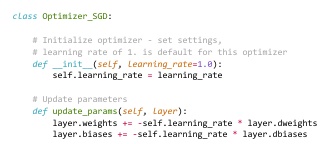

To use this, we need to create an optimizer object:


Then update our network layer’s parameters after calculating the gradient using:
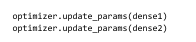

Recall that the layer object contains its parameters (weights and biases) and also, at this stage, the gradient that is calculated during backpropagation. We store these in the layer’s properties so that the optimizer can make use of them. In our main neural network code, we’d bring the optimization in after backpropagation. Let’s make a 1x64 densely-connected neural network (1 hidden layer with 64 neurons) and use the same dataset as before:

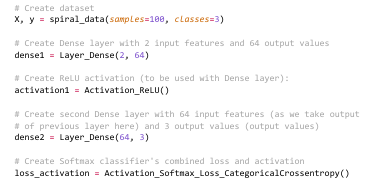

The next step is to create the optimizer’s object:

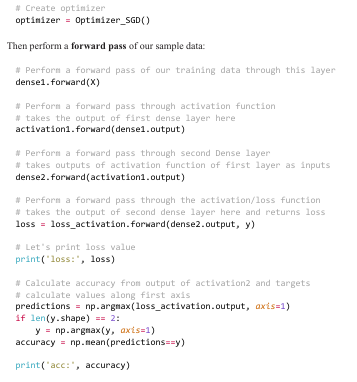


Next, we do our ​backward pass​, which is also called ​backpropagation​:

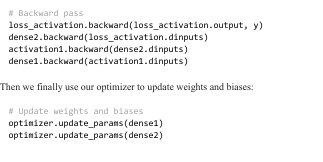

10 This is everything we need to train our model! But why would we only perform this optimization once, when we can perform it lots of times by leveraging Python’s looping capabilities? We will repeatedly perform a forward pass, backward pass, and optimization until we reach some stopping point. Each full pass through all of the training data is called an ​epoch​. In most deep learning tasks, a neural network will be trained for multiple epochs, though the ideal scenario would be to have a perfect model with ideal weights and biases after only one epoch. To add multiple epochs of training into our code, we will initialize our model and run a loop around all the code performing the forward pass, backward pass, and optimization calculations:

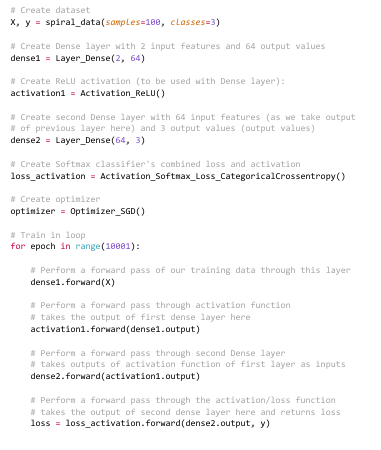

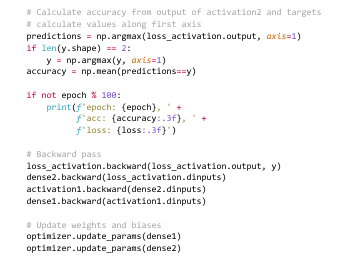
This gives us an update of where we are (epochs), the model’s accuracy, and loss every 100 epochs. Initially, we can see consistent improvement:

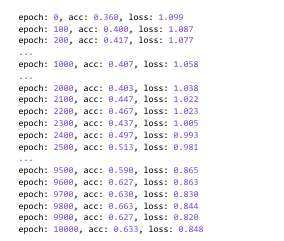

Additionally, we’ve prepared animations to help visualize the training process and to convey the impact of various optimizers and their hyperparameters. The left part of the animation canvas


contains dots, where color represents each of the 3 classes of the data, the coordinates are features, and the background colors show the model prediction areas. Ideally, the points’ colors and the background should match if the model classifies correctly. The surrounding area should also follow the data’s “trend” — which is what we’d call generalization — the ability of the model to correctly predict unseen data. The colorful squares on the right show weights and biases — red for positive and blue for negative values. The matching areas right below the Dense 1 bar and next to the Dense 2 bar show the updates that the optimizer performs to the layers. The updates might look overly strong compared to the weights and biases, but that’s because we’ve visually normalized them to the maximum value, or else they would be almost invisible since the updates are quite small at a time. The other 3 graphs show the loss, accuracy, and current learning rate values in conjunction with the training time, epochs in this case.


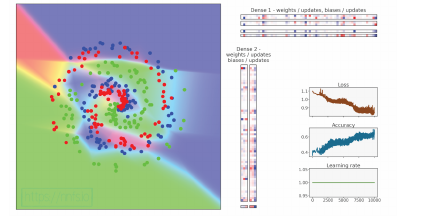
Figure 1:​ Model training with Stochastic Gradient Descent optimizer. Epilepsy Warning, there are quick flashing colors in the animation:

Our neural network mostly stays stuck at around a loss of 1 and later 0.85-0.9, and an accuracy around 0.60. The animation also has a “flashy wiggle” effect, which most likely means we chose too high of a learning rate. Given that loss didn’t decrease much, we can assume that this learning rate, being too high, also caused the model to get stuck in a ​local minimum​, which we’ll learn more about soon. Iterating over more epochs doesn’t seem helpful at this point, which tells us that we’re likely stuck with our optimization. Does this mean that this is the most we can get from our optimizer on this dataset? Recall that we’re adjusting our weights and biases by applying some fraction, in this case, ​1.0​, to the gradient and subtracting this from the weights and biases. This fraction is called the ​learning rate​ (LR) and is the primary adjustable parameter for the optimizer as it decreases loss. To gain an intuition for adjusting, planning, or initially setting the learning rate, we should first understand how the learning rate affects the optimizer and output of the loss function.

## Learning Rate 

So far, we have a gradient of a model and the loss function with respect to all of the parameters, and we want to apply a fraction of this gradient to the parameters in order to descend the loss value. In most cases, we won’t apply the negative gradient as is, as the direction of the function’s steepest descent will be continuously changing, and these values will usually be too big for meaningful model improvements to occur. Instead, we want to perform small steps — calculating the gradient, updating parameters by a negative fraction of this gradient, and repeating this in a loop. Small steps ensure that we are following the direction of the steepest descent, but these steps can also be too small, causing learning stagnation — we’ll explain this shortly. Let’s forget, for a while, that we are performing gradient descent of an n-dimensional function (our loss function), where n is the number parameters (weights and biases) that the model contains, and assume that we have just one dimension to the loss function (a singular input). Our goal for the following images and animations is to visualize some concepts and gain an intuition; thus, we will not use or present certain optimizer settings, and instead will be considering things in more general terms. That said, we’ve used a real SGD optimizer on a real function to prepare all of the following examples. Here’s the function where we want to determine what input to it will result in the lowest possible output:

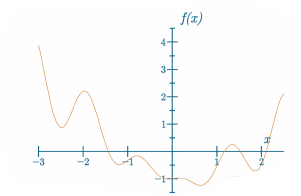
Fig 10.02:​ Example function to minimize the output.

We can see the ​global minimum​ of this function, which is the lowest possible ​y​ value that this function can output. This is the goal — to minimize the function’s output to find the global minimum. The values of the axes are not important in this case. The goal is only to show the function and the learning rate concept. Also, remember that this one-dimensional function example is being used merely to aid in visualization. It would be easy to solve this function with simpler math than what is required to solve the much larger n-dimensional loss function for neural networks, where n (which is the number of weights and biases) can be in the millions or even billions (or more). When we have millions of, or more, dimensions, gradient descent is the best-known way to search for a global minimum. We’ll start descending from the left side of this graph. With an example learning rate:
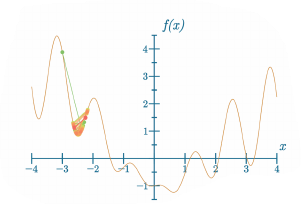

Figure 3:​ Stuck in the first local minimum.
The learning rate turned out to be too small. Small updates to the parameters caused stagnation in the model’s learning — the model got stuck in a local minimum. The ​local minimum​ is a minimum that is near where we look but isn’t necessarily the global minimum, which is the absolute lowest point for a function. With our example here, as well as with optimizing full neural networks, we do not know where the global minimum is. How do we know if we’ve reached the global minimum or at least gotten close? The loss function measures how far the model is with its predictions to the real target values, so, as long as the loss value is not ​0​ or very close to ​0​, and the model stopped learning, we’re at some local minimum. In reality, we almost never approach a loss of ​0​ for various reasons. One reason for this may be imperfect neural network hyperparameters. Another reason for this may be insufficient data. If you did reach a loss of 0 with a neural network, you should find it suspicious, for reasons we’ll get into later in this book.
We can try to modify the learning rate:
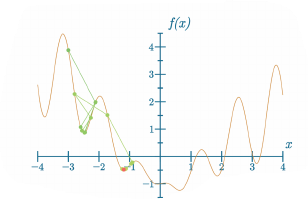
Figure 4:​ Stuck in the second local minimum.

This time, the model escaped this local minimum but got stuck at another one. Let’s see one more example after another learning rate change:

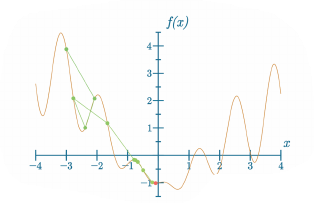
Fig 10.05:​ Stuck in the third local minimum, near the global minimum.

This time the model got stuck at a local minimum near the global minimum. The model was able to escape the “deeper” local minimums, so it might be counter-intuitive why it is stuck here. Remember, the model follows the direction of steepest descent of the loss function, no matter how large or slight the descent is. For this reason, we’ll introduce momentum and the other techniques to prevent such situations.

Momentum, in an optimizer, adds to the gradient what, in the physical world, we could call inertia — for example, we can throw a ball uphill and, with a small enough hill or big enough applied force, the ball can roll-over to the other side of the hill. Let’s see how this might look with the model in training:

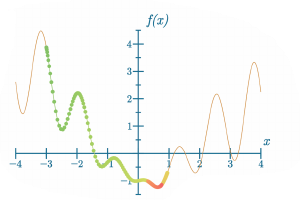
Figure 6:​ Reached the global minimum, too low learning rate.

We used a very small learning rate here with a large momentum. The color change from green, through orange to red presents the advancement of the gradient descent process, the steps. We can see that the model achieved the goal and found the global minimum, but this took many steps. Can this be done better?
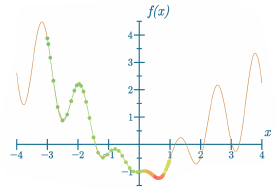
Figure 7:​ Reached the global minimum, better learning rate.

And even further:

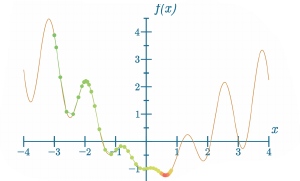

Figure 8:​ Reached the global minimum, significantly better learning rate.

With these examples, we were able to find the global minimum in about 200, 100, and 50 steps, respectively, by modifying the learning rate and the momentum. It’s possible to significantly shorten the training time by adjusting the parameters of the optimizer. However, we have to be careful with these hyper-parameter adjustments, as this won’t necessarily always help the model:
With the learning rate set too high, the model might not be able to find the global minimum. Even, at some point, if it does, further adjustments could cause it to jump out of this minimum. We’ll see this behavior later in this chapter — try to take a close look at results and see if you can find it, as well as the other issues we’ve described, from the different optimizers as we work through them.

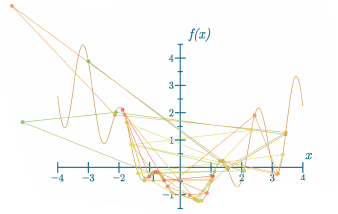

Figure 9:​ Unstable model, learning rate too big.

With the learning rate set too high, the model might not be able to find the global minimum. Even, at some point, if it does, further adjustments could cause it to jump out of this minimum. We’ll see this behavior later in this chapter — try to take a close look at results and see if you can find it, as well as the other issues we’ve described, from the different optimizers as we work through them.

In this case, the model was “jumping” around some minimum and what this might mean is that we should try to lower the learning rate, raise the momentum, or possibly apply a learning rate decay (lowering the learning rate during training), which we’ll describe in this chapter. If we set the learning rate far too high:

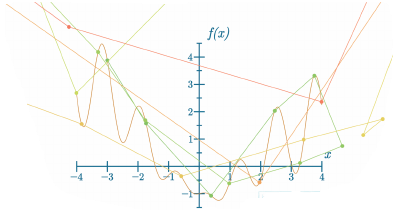
Fig 10.10:​ Unstable model, learning rate significantly too big.

In this situation, the model starts “jumping” around, and moves in what we might observe as random directions. This is an example of “overshooting,” with every step — the direction of a change is correct, but the amount of the gradient applied is too large. In an extreme situation, we could cause a ​gradient explosion​:
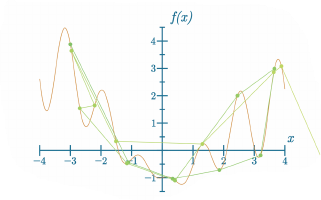
Fig 10.11:​ Broken model, learning rate critically too big.
A gradient explosion is a situation where the parameter updates cause the function’s output to rise instead of fall, and, with each step, the loss value and gradient become larger. At some point, the floating-point variable limitation causes an overflow as it cannot hold values of this size anymore, and the model is no longer able to train. It’s crucial to recognize this situation forming during training, especially for large models, where the training can take days, weeks, or more. It is possible to tune the model’s hyper-parameters in time to save the model and to continue training.

When we choose the learning rate and the other hyper-parameters correctly, the learning process can be relatively quick:
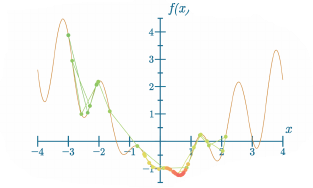
Figure 12:​ Model learned, good learning rate, can be better.
This time it took significantly less time for the model to find the global minimum, but it can always be better:
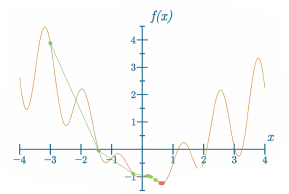
Fig13:​ An efficient learning example.
This time the model needed just a few steps to find the global minimum. The challenge is to choose the hyper-parameters correctly, and it is not always an easy task. It is usually best to start with the optimizer defaults, perform a few steps, and observe the training process when tuning different settings. It is not always possible to see meaningful results in a short-enough period of time, and, in this case, it’s good to have the ability to update the optimizer’s settings during training. How you choose the learning rate, and other hyper-parameters, depends on the model, data, including the amount of data, the parameter initialization method, etc. There is no single, best way to set hyper-parameters, but experience usually helps. As we mentioned, one
of the challenges during the training of a neural network model is to choose the right settings. The difference can be anything from a model not learning at all to learning very well. For a summary of learning rates — if we plot the loss along an axis of steps:

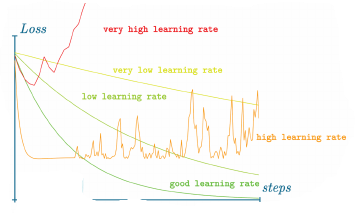

Figure 14:​ Graphs of the loss in a function of steps, different rates 


We can see various examples of relative learning rates and what loss will ideally look like as a graph over time (steps) of training. Knowing what the learning rate should be to get the most out of your training process isn’t possible, but a good rule is that your initial training will benefit from a larger learning rate to take initial steps faster. If you start with steps that are too small, you might get stuck in a local minimum and be unable to leave it due to not making large enough updates to the parameters. For example, what if we make the learning rate 0.85 rather than 1.0 with the SGD optimizer?

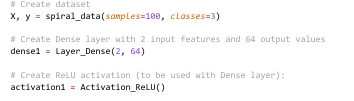

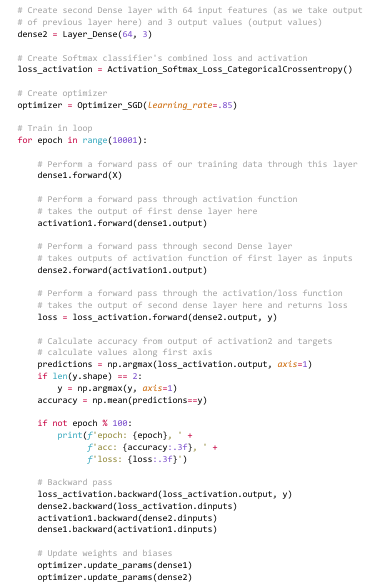
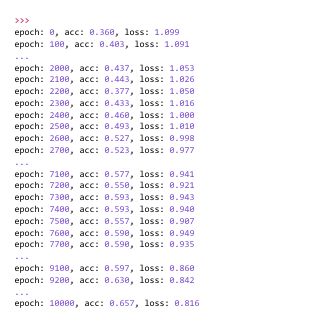
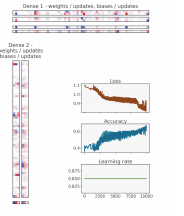
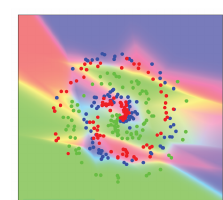
Figure 15:​ Model training with SGD optimizer and lowered learning rate.

As you can see, the neural network did slightly better in terms of accuracy, and it achieved a lower loss; lower loss is not always associated with higher accuracy. Remember, even if we desire the best accuracy out of our model, the optimizer’s task is to decrease loss, not raise accuracy directly. Loss is the mean value of all of the sample losses, and some of them could drop significantly, while others might rise just slightly, changing the prediction for them from a correct to an incorrect class at the same time. This would cause a lower mean loss in general, but also more incorrectly predicted samples, which will, at the same time, lower the accuracy. A likely reason for this model’s lower accuracy is that it found another local minimum by chance — the descent path has changed, due to smaller steps. In a direct comparison of these two models in training, different learning rates did not show that the lower this learning rate value is, the better. In most cases, we want to start with a larger learning rate and decrease the learning rate over time/steps. A commonly-used solution to keep initial updates large and explore various learning rates during training is to implement a ​learning rate decay​.




## Learning Rate 

Decay The idea of a ​learning rate decay​ is to start with a large learning rate, say 1.0 in our case, and then decrease it during training. There are a few methods for doing this. One is to decrease the learning rate in response to the loss across epochs — for example, if the loss begins to level out/ plateau or starts “jumping” over large deltas. You can either program this behavior-monitoring logically or simply track your loss over time and manually decrease the learning rate when you deem it appropriate. Another option, which we will implement, is to program a ​Decay Rate​, which steadily decays the learning rate per batch or epoch. Let’s plan to decay per step. This can also be referred to as ​1/t decaying​ or ​exponential decaying​. Basically, we’re going to update the learning rate each step by the reciprocal of the step count fraction. This fraction is a new hyper-parameter that we’ll add to the optimizer, called the ​learning rate decay​. How this decaying works is it takes the step and the decaying ratio and multiplies them. The further in training, the bigger the step is, and the bigger result of this multiplication is. We then take its reciprocal (the further in training, the lower the value) and multiply the initial learning rate by it. The added ​1​ makes sure that the resulting algorithm never raises the learning rate. For example, for the first step, we might divide 1 by the learning rate, 0.001​ for example, which will result in a current learning rate of ​1000​. That’s definitely not what we wanted. 1 divided by the 1+fraction ensures that the result, a fraction of the starting learning rate, will always be less than or equal to 1, decreasing over time. That’s the desired result — start with the current learning rate and make it smaller with time. The code for determining the current decay rate:

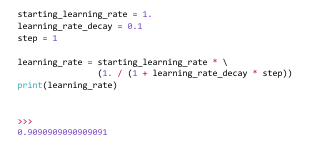
In practice, 0.1 would be considered a fairly aggressive decay rate, but this should give you a sense of the concept. If we are on step 20:
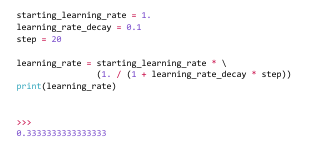
We can also simulate this in a loop, which is more comparable to how we will be applying learning rate decay:
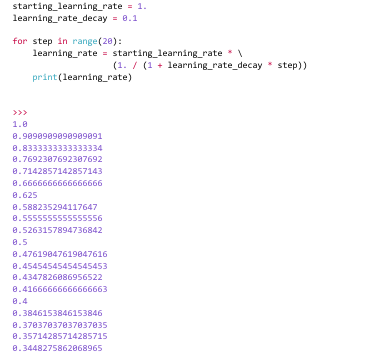

This learning rate decay scheme lowers the learning rate each step using the mentioned formula. Initially, the learning rate drops fast, but the change in the learning rate lowers each step, letting the model sit as close as possible to the minimum. The model needs small updates near the end of training to be able to get as close to this point as possible. We can now update our SGD optimizer class to allow for the learning rate decay:


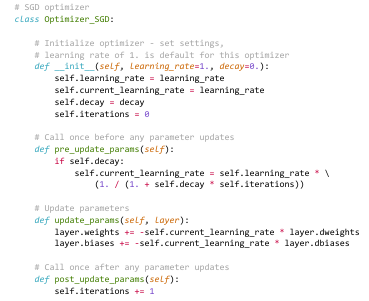


We’ve updated a few things in the SGD class. First, in the ​__init__​ ​method, we added handling for the current learning rate, and ​self.learning_rate​ is now the initial learning rate. We also added attributes to track the decay rate and the number of iterations that the optimizer has gone through. Next, we added a new method called ​pre_update_params​. This method, if we have a decay rate other than 0, will update our ​self.current_learning_rate using the prior formula. The ​update_params​ m ​ ethod remains unchanged, but we do have a new ​post_update_params​ method that will add to our ​self.iterations​ t​ racking. With our updated SGD optimizer class, we’ve added printing the current learning rate, and added pre and post optimizer method calls. Let’s use a decay rate of 1e-2 (0.01) and train our model again:

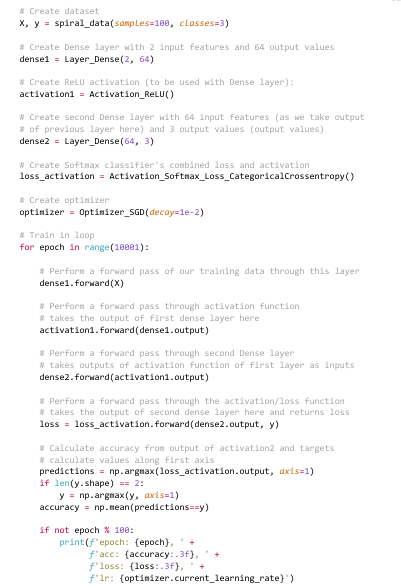
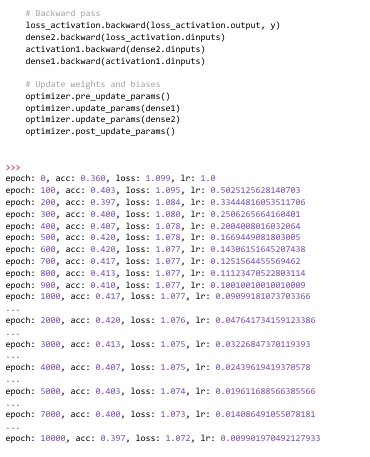
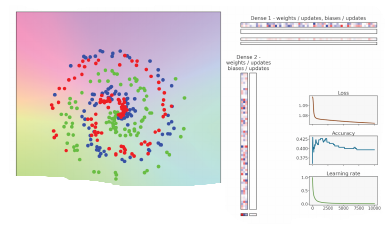
Figure 16:​ Model training with SGD optimizer and and learning rate decay set too high.

This model definitely got stuck, and the reason is almost certainly because the learning rate decayed far too quickly and became too small, trapping the model in some local minimum. This is most likely why, rather than wiggling, our accuracy and loss stopped changing ​at all.​ We can, instead, try to decay a bit slower by making our decay a smaller number. For example, let’s go with 1e-3 (0.001):

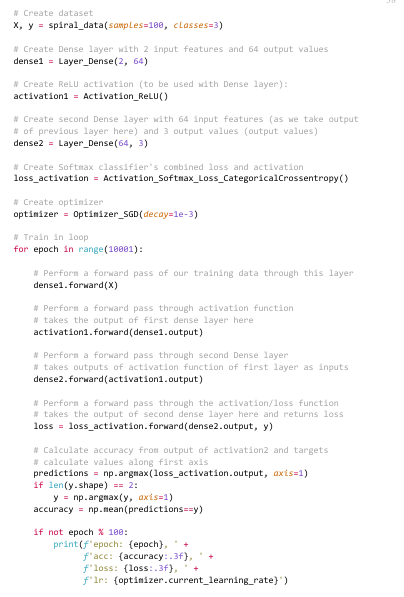
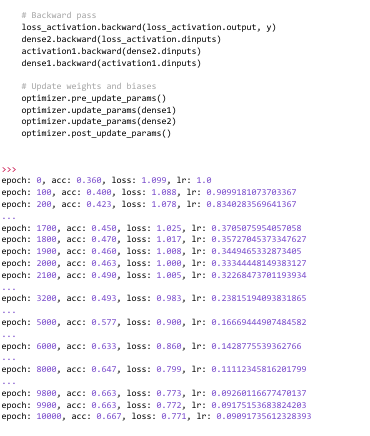

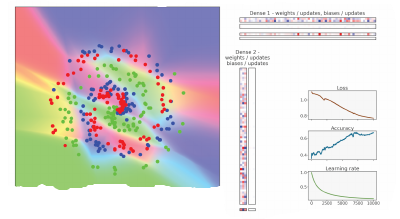
Figure 17:​ Model training with SGD optimizer and more proper learning rate decay.

In this case, we’ve achieved our lowest loss and highest accuracy thus far, but it still should be possible to find parameters that will give us even better results. For example, you may suspect that the initial learning rate is too high. It can make for a great exercise to attempt to find better settings. Feel free to try! Stochastic Gradient Descent with learning rate decay can do fairly well but is still a fairly basic optimization method that only follows a gradient without any additional logic that could potentially help the model find the ​global​ m ​ inimum​ to the loss function. One option for improving the SGD optimizer is to introduce ​momentum​.

Stochastic Gradient Descent with Momentum Momentum creates a rolling average of gradients over some number of updates and uses this average with the unique gradient at each step. Another way of understanding this is to imagine a ball going down a hill — even if it finds a small hole or hill, momentum will let it go straight through it towards a lower minimum — the bottom of this hill. This can help in cases where you’re stuck in some local minimum (a hole), bouncing back and forth. With momentum, a model is more likely to pass through local minimums, further decreasing loss. Simply put, momentum may still point towards the global gradient descent direction. Recall this situation from the beginning of this chapter:
Recall this situation from the beginning of this chapter:

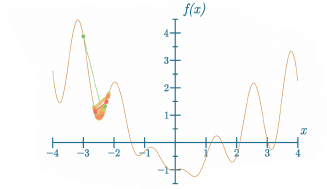

With regular updates, the SGD optimizer might determine that the next best step is one that keeps the model in a local minimum. Remember that the gradient points toward the current steepest loss ascent for that step — taking the negative of the gradient vector flips it toward the current steepest descent, which may not necessarily follow descent towards the global minimum — the current steepest descent may point towards a local minimum. So this step may decrease loss for that update but might not get us out of the local minimum. We might wind up with a gradient

 that points in one direction and then the opposite direction in the next update; the gradient could continue to bounce back and forth around a local minimum like this, keeping the optimization of the loss stuck. Instead, momentum uses the previous update’s direction to influence the next update’s direction, minimizing the chances of bouncing around and getting stuck. Recall another example shown in this chapter:

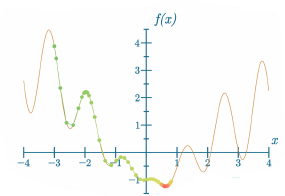
We utilize momentum by setting a parameter between 0 and 1, representing the fraction of the previous parameter update to retain, and subtracting (adding the negative) our actual gradient, multiplied by the learning rate (like before), from it. The update contains a portion of the gradient from preceding steps as our momentum (direction of previous changes) and only a portion of the current gradient; together, these portions form the actual change to our parameters and the bigger the role that momentum takes in the update, the slower the update can change the direction. When we set the momentum fraction too high, the model might stop learning at all since the direction of the updates won’t be able to follow the global gradient descent. The code for this is as follows:


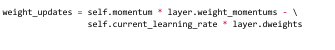

The hyperparameter, ​self.momentum​,​ ​is chosen at the start and the layer.weight_momentums​ ​start as all zeros but are altered during training as:



This means that the momentum is always the previous update to the parameters. We will perform the same operations as the above with the biases. We can then update our SGD optimizer class’ update_params​ method with the momentum calculation, applying with the parameters, and retaining them for the next steps as an alternative chain of operations to the current code. The difference is that we only calculate the updates and we add these updates with the common code:
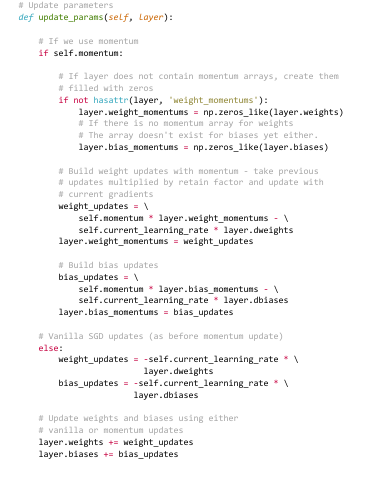


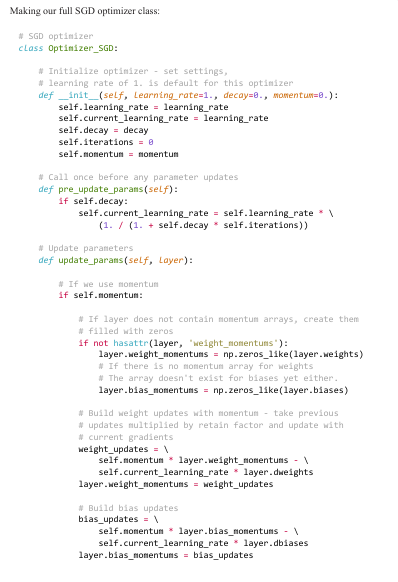

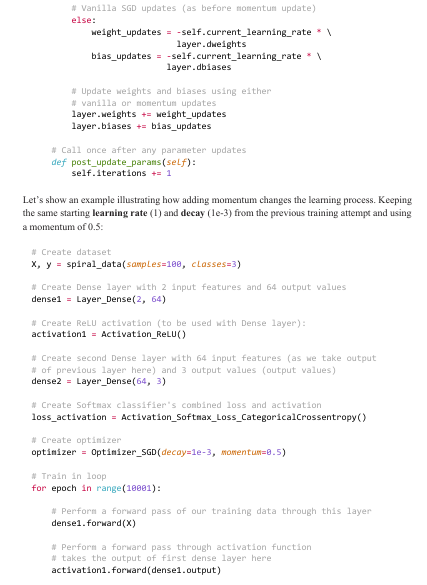

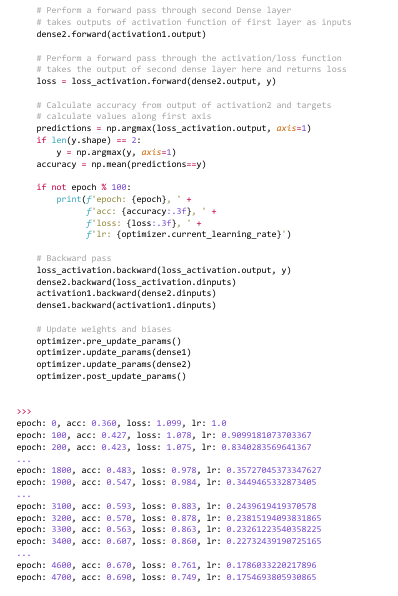
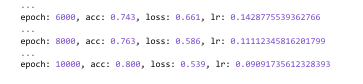
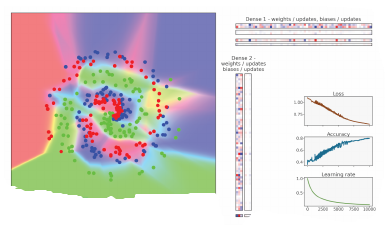
Figure 18:​ Model training with SGD optimizer, learning rate decay and Momentum.

The model achieved the lowest loss and highest accuracy that we’ve seen so far, but can we do even better? Sure we can! Let’s try to set the momentum to 0.9:

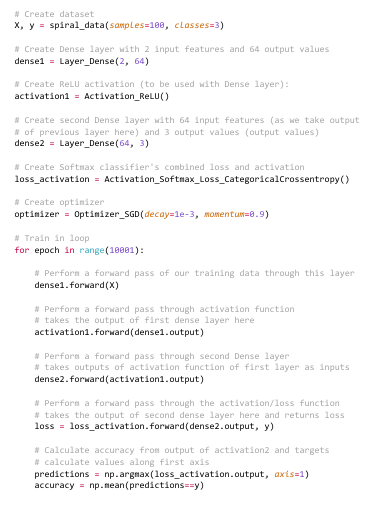

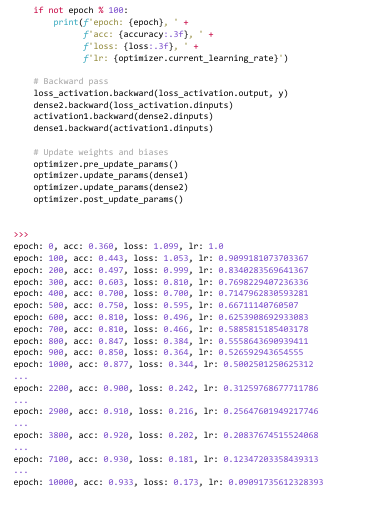

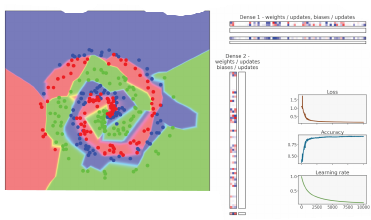

Figure 19:​ Model training with SGD optimizer, learning rate decay and Momentum (tuned).
This is a decent enough example of how momentum can prove useful. The model achieved an accuracy of almost 88% in the first 1000 epochs and improved further, ending with an accuracy of 93.3% and a loss of 0.173. These results are a great improvement. The SGD optimizer with momentum is usually one of 2 main choices for an optimizer in practice next to the Adam optimizer, which we’ll talk about shortly. First, we have 2 other optimizers to talk about. The next modification to Stochastic Gradient Descent is ​AdaGrad​.




## AdaGrad 

AdaGrad​, short for ​adaptive gradient​, institutes a per-parameter learning rate rather than a globally-shared rate. The idea here is to normalize updates made to the features. During the training process, some weights can rise significantly, while others tend to not change by much. It is usually better for weights to not rise too high compared to the other weights, and we’ll talk about this with regularization techniques. AdaGrad provides a way to normalize parameter updates by keeping a history of previous updates — the bigger the sum of the updates is, in either direction (positive or negative), the smaller updates are made further in training. This lets less-frequently updated parameters to keep-up with changes, effectively utilizing more neurons for training. The concept of AdaGrad can be contained in the following two lines of code:

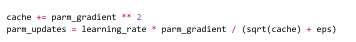

The ​cache​ holds a history of squared gradients, and the ​parm_updates​ is a function of the learning rate multiplied by the gradient (basic SGD so far) and then is divided by the square root of the cache plus some ​epsilon​ value. The division operation performed with a constantly rising cache might also cause the learning to stall as updates become smaller with time, due to the monotonic nature of updates. That’s why this optimizer is not widely used, except for some specific applications. The ​epsilon​ is a ​hyperparameter​ (pre-training control knob setting) preventing division by 0. The epsilon value is usually a small value, such as ​1e-7​, which we’ll be defaulting to. You might also notice that we are summing the squared value, only to calculate the square root later, which might look counter-intuitive as to why we do this. We are adding squared values and taking the square root, which is not the same as just adding the value, for example:
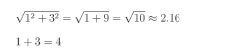


The resulting cache value grows slower, and in a different way, taking care of the negative numbers (we would not want to divide the update by the negative number and flip its sign). Overall, the impact is the learning rates for parameters with smaller gradients are decreased slowly, while the parameters with larger gradients have their learning rates decreased faster.
To implement AdaGrad, we start by copying and pasting our SGD optimizer class, changing the name, adding a property for ​epsilon​ with a default of 1e-7 to the ​__init__​ method, and removing the momentum. Next, inside the ​update_params​ method, we’ll replace the momentum code with:

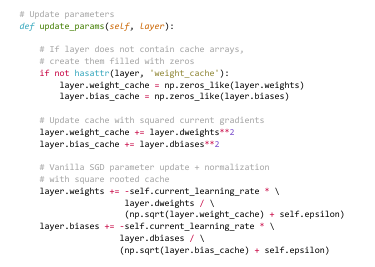

We added the cache and its updates, then added dividing the updates by the square root of the cache. Full code for the AdaGrad optimizer:

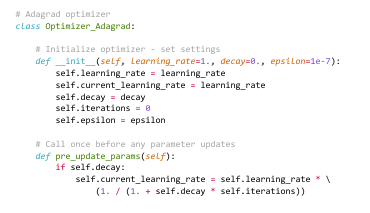

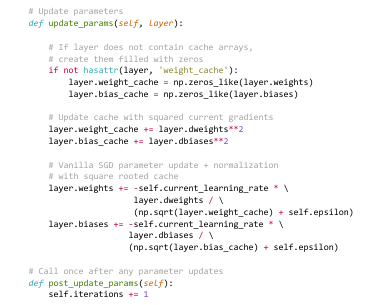


Testing this optimizer now with decaying set to ​1e-4​ as well as ​1e-5​ works better than ​1e-3,​ which we have used previously. This optimizer with our dataset works better with lesser decaying:
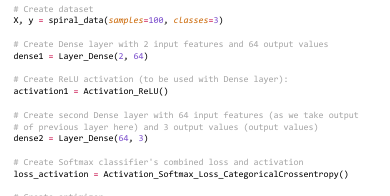

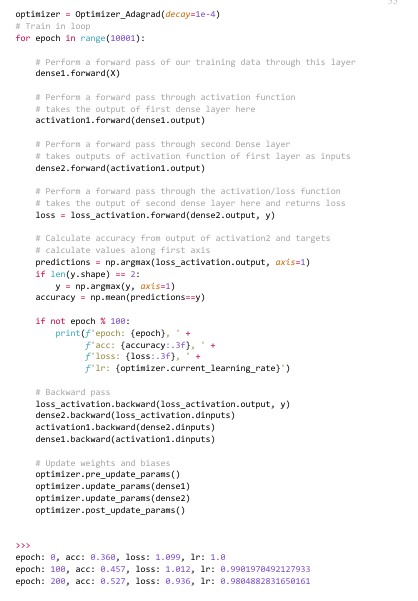

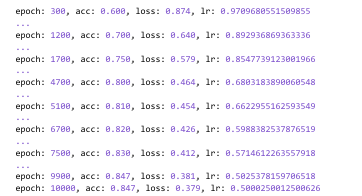
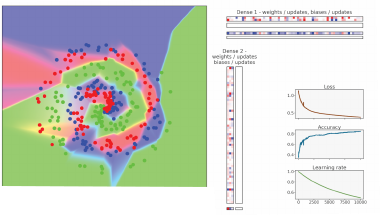

Figure 20:​ Model training with AdaGrad optimizer.

AdaGrad worked quite well here, but not as good as SGD with momentum, and we can see that loss consistently fell throughout the entire training process. It is interesting to note that AdaGrad initially took a few more epochs to reach similar results to Stochastic Gradient Descent with momentum.




## RMSProp 

Continuing with Stochastic Gradient Descent adaptations, we reach ​RMSProp​, short for ​Root Mean Square Propagation​. Similar to AdaGrad, RMSProp calculates an adaptive learning rate per parameter; it’s just calculated in a different way than AdaGrad. Where AdaGrad calculates the cache as:

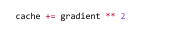
RMSProp calculates the cache as:




Note that this is similar to both momentum with the SGD optimizer and cache with the AdaGrad. RMSProp adds a mechanism similar to momentum but also adds a per-parameter adaptive learning rate, so the learning rate changes are smoother. This helps to retain the global direction of changes and slows changes in direction. Instead of continually adding squared gradients to a cache (like in Adagrad), it uses a moving average of the cache. Each update to the cache retains a part of the cache and updates it with a fraction of the new, squared, gradients. In this way, cache contents “move” with data in time, and learning does not stall. In the case of this optimizer, the per-parameter learning rate can either fall or rise, depending on the last updates and current gradient. RMSProp applies the cache in the same way as AdaGrad does.

The new hyperparameter here is ​rho​. ​Rho​ is the cache memory decay rate. Because this optimizer, with default values, carries over so much momentum of gradient and the adaptive learning rate updates, even small gradient updates are enough to keep it going; therefore, a default learning rate of ​1​ is far too large and causes instant model instability. A learning rate that becomes stable again and gives fast enough updates is around ​0.001​ (that’s also the default value for this optimizer used in well-known machine learning frameworks). That’s what we’ll use as default from now on too. The following is the full code for RMSProp optimizer class:


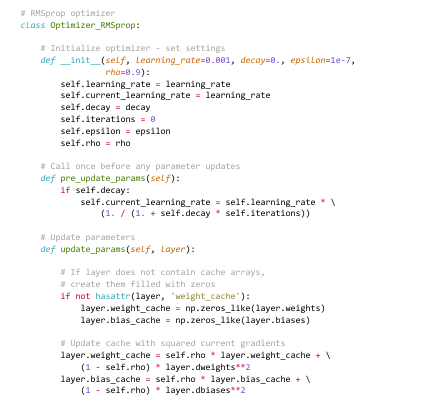

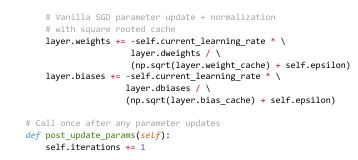

Changing the optimizer used in our main neural network testing code:



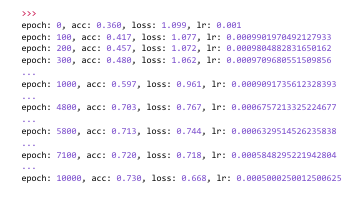
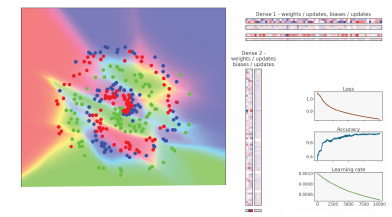
Figure 21:​ Model training with RMSProp optimizer.

The results are not the greatest, but we can slightly tweak the hyperparameters:
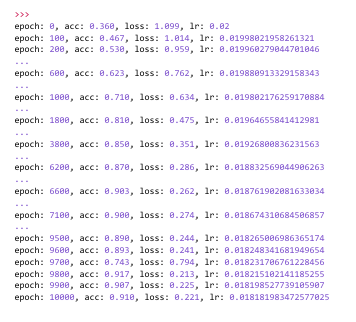